In [134]:
import pandas as pd
import numpy as np

orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')
aisle = pd.read_csv('aisle.csv')   # this matches your file name!

print("Orders:")
display(orders.head())

print("Products:")
display(products.head())

print("Departments:")
display(departments.head())

print("Aisle:")
display(aisle.head())


Orders:


,order_id,user_id,product_id,quantity,order_date,order_dow,order_hour_of_day,days_since_prior_order,order_status
0,2852335,62688,47022,8,2015-01-01,2,16,5.0,Processing
1,2808176,678,8620,15,2015-01-01,4,22,7.0,Processing
2,1420679,62985,13821,11,2015-01-01,3,17,3.0,Shipped
3,2936595,61969,9769,9,2015-01-01,2,16,30.0,Processing
4,2864781,684,2744,11,2015-01-01,2,14,6.0,Processing


Products:


,product_id,product_name,aisle_id,department_id,unit_cost,unit_price
0,1,Chocolate Sandwich Cookies,61,19,36.9,41
1,2,All-Seasons Salt,104,13,44.1,49
2,3,Robust Golden Unsweetened Oolong Tea,94,7,15.3,17
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,34.2,38
4,5,Green Chile Anytime Sauce,5,13,17.1,19


Departments:


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Aisle:


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [135]:
# See how many rows and columns in each table
print("Orders shape:", orders.shape)
print("Products shape:", products.shape)
print("Departments shape:", departments.shape)
print("Aisle shape:", aisle.shape)

# See the column names for each table
print("\nOrders columns:", orders.columns.tolist())
print("Products columns:", products.columns.tolist())
print("Departments columns:", departments.columns.tolist())
print("Aisle columns:", aisle.columns.tolist())


Orders shape: (1048575, 9)
Products shape: (49688, 6)
Departments shape: (21, 2)
Aisle shape: (134, 2)

Orders columns: ['order_id', 'user_id', 'product_id', 'quantity', 'order_date', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'order_status']
Products columns: ['product_id', 'product_name', 'aisle_id', 'department_id', 'unit_cost', 'unit_price']
Departments columns: ['department_id', 'department']
Aisle columns: ['aisle_id', 'aisle']


In [136]:
# Check for missing (empty) values
print("Missing values in orders:\n", orders.isnull().sum())
print("\nMissing values in products:\n", products.isnull().sum())
print("\nMissing values in departments:\n", departments.isnull().sum())
print("\nMissing values in aisle:\n", aisle.isnull().sum())

# Check for duplicate rows
print("Duplicate orders:", orders.duplicated().sum())
print("Duplicate products:", products.duplicated().sum())
print("Duplicate departments:", departments.duplicated().sum())
print("Duplicate aisles:", aisle.duplicated().sum())


Missing values in orders:
 order_id                      0
user_id                       0
product_id                    0
quantity                      0
order_date                    0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    63100
order_status                  0
dtype: int64

Missing values in products:
 product_id       0
product_name     0
aisle_id         0
department_id    0
unit_cost        0
unit_price       0
dtype: int64

Missing values in departments:
 department_id    0
department       0
dtype: int64

Missing values in aisle:
 aisle_id    0
aisle       0
dtype: int64
Duplicate orders: 0
Duplicate products: 0
Duplicate departments: 0
Duplicate aisles: 0


In [137]:
# Show 10 random rows from products
products.sample(10)
products['product_id'].nunique()


49688

In [138]:
# Convert order_date to a datetime type (very important!)
orders['order_date'] = pd.to_datetime(orders['order_date'])

# Find the first and last order date in your data
print("Earliest order date:", orders['order_date'].min())
print("Latest order date:", orders['order_date'].max())


Earliest order date: 2015-01-01 00:00:00
Latest order date: 2023-04-07 00:00:00


In [139]:
# Create a 'year_month' column for grouping
orders['year_month'] = orders['order_date'].dt.to_period('M')

# Count total sales per month
monthly_sales = orders.groupby('year_month').size()

# Show the monthly sales
print(monthly_sales)


year_month
2015-01    10763
2015-02     9724
2015-03    10838
2015-04    10502
2015-05    10770
           ...  
2022-12    10597
2023-01    10825
2023-02     9797
2023-03    10829
2023-04     2452
Freq: M, Length: 100, dtype: int64


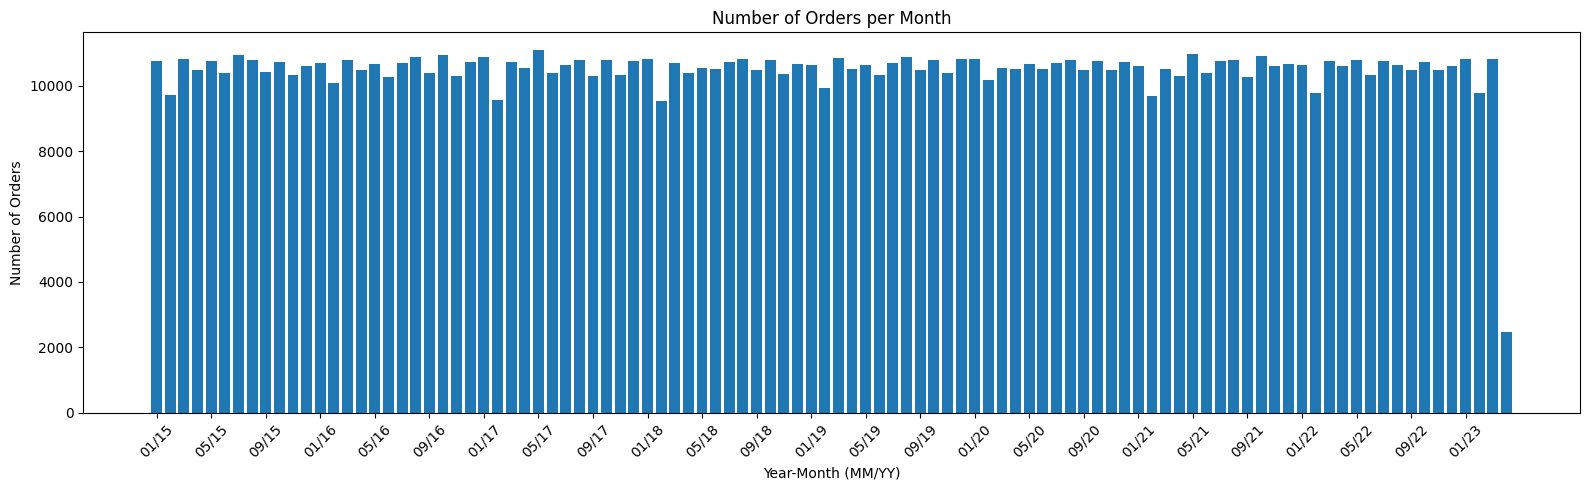

In [140]:
import matplotlib.pyplot as plt

# Convert year_month to string in MM/YY format
monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales.index = monthly_sales.index.strftime('%m/%y')

plt.figure(figsize=(16,5))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.title("Number of Orders per Month")
plt.xlabel("Year-Month (MM/YY)")
plt.ylabel("Number of Orders")

# Show only every 4th x label to avoid crowding
plt.xticks(ticks=range(0, len(monthly_sales.index), 4), 
           labels=monthly_sales.index[::4], rotation=45)

plt.tight_layout()
plt.show()


In [141]:
top_products = (orders.groupby('product_id')['quantity']
                .sum()
                .sort_values(ascending=False)
                .head(10)
                .reset_index())
# Merge with products table to get names
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id')
print(top_products)


   product_id  quantity                                       product_name
0       21432       479                            Colby Jack Cheese Block
1       27632       461                             Ocean Breeze Body Wash
2        6455       455                               Organic Magic Muesli
3       22613       444                  Organic African Nectar Herbal Tea
4       30079       443                Shea Butter & Vitamin E Body Lotion
5       26626       440                          PLOCHMANS Squeeze Mustard
6       28185       437          Vanilla, Tangerine & Shortbread Ice Cream
7       38189       435  Clif Kid ZBar Organic Iced Lemon Cookie Energy...
8       31145       433              Fine De Luxe Blended Canadian Whiskey
9       27732       432            Healthy Skin & Hair Plus Nails Softgels


In [142]:
# First, merge orders with products and departments
orders_products = orders.merge(products, on='product_id', how='left')
orders_products = orders_products.merge(departments, on='department_id', how='left')

top_departments = (orders_products.groupby('department')['quantity']
                   .sum()
                   .sort_values(ascending=False)
                   .reset_index())

print(top_departments.head(10))


        department  quantity
0    personal care   1518767
1           snacks   1454220
2           pantry   1246148
3        beverages   1016127
4           frozen    930907
5       dairy eggs    796570
6        household    714169
7     canned goods    487942
8  dry goods pasta    429368
9          produce    392167


In [143]:
# We'll use the merged orders_products dataframe
top_dept = 'personal care'

# Filter for personal care orders
dept_orders = orders_products[orders_products['department'] == top_dept]

# Group by month and sum the quantity
dept_monthly = (dept_orders
                .groupby(dept_orders['order_date'].dt.to_period('M'))['quantity']
                .sum()
                .sort_index())

# Preview result
print(dept_monthly.head())


order_date
2015-01    15170
2015-02    14401
2015-03    15396
2015-04    15387
2015-05    15773
Freq: M, Name: quantity, dtype: int64


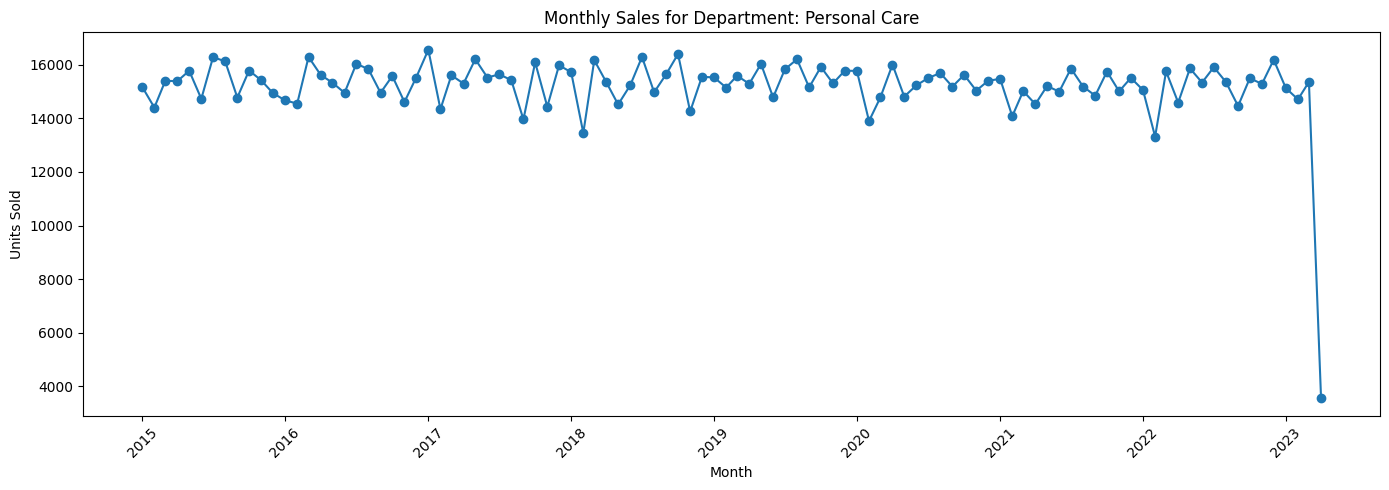

In [144]:
import matplotlib.pyplot as plt

# Convert PeriodIndex to Timestamp for plotting
dept_monthly.index = dept_monthly.index.to_timestamp()

plt.figure(figsize=(14,5))
plt.plot(dept_monthly.index, dept_monthly.values, marker='o')
plt.title("Monthly Sales for Department: Personal Care")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/0s/y1xyyt75329_kgbv_y81flg80000gn/T/ipykernel_38890/2870131099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_orders['month'] = dept_orders['order_date'].dt.month


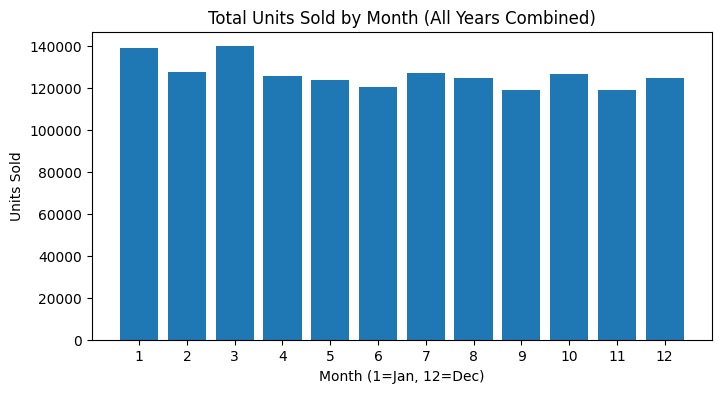

In [145]:
# Add a column for the month (1 = Jan, 2 = Feb, etc.)
dept_orders['month'] = dept_orders['order_date'].dt.month

# Group by month and average across years
monthly_pattern = dept_orders.groupby('month')['quantity'].sum()

# Plot
plt.figure(figsize=(8,4))
plt.bar(monthly_pattern.index, monthly_pattern.values)
plt.title("Total Units Sold by Month (All Years Combined)")
plt.xlabel("Month (1=Jan, 12=Dec)")
plt.ylabel("Units Sold")
plt.xticks(range(1,13))
plt.show()


In [146]:
# Remove the last partial month if needed (already cleaned as 'dept_monthly_clean')
# If not already done:
dept_monthly_clean = dept_monthly[dept_monthly > 0]
dept_monthly_clean = dept_monthly_clean.iloc[:-1]

# Double check the index is datetime for statsmodels
dept_monthly_clean.index = pd.to_datetime(dept_monthly_clean.index)


In [147]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Build and fit the model
hw_model = ExponentialSmoothing(
    dept_monthly_clean.values,          # Our sales data as a numpy array
    trend="add",                        # We allow for a linear trend (additive)
    seasonal="add",                     # Seasonality effect is additive
    seasonal_periods=12                 # 12 months in a year
).fit()


In [148]:
forecast_steps = 6  # You can change this to forecast more or fewer months

# Forecast for the next 6 months
forecast = hw_model.forecast(steps=forecast_steps)

# Make date labels for the forecast period
last_date = dept_monthly_clean.index[-1]
forecast_index = pd.date_range(
    start=last_date + pd.offsets.MonthBegin(),
    periods=forecast_steps,
    freq='MS'
)


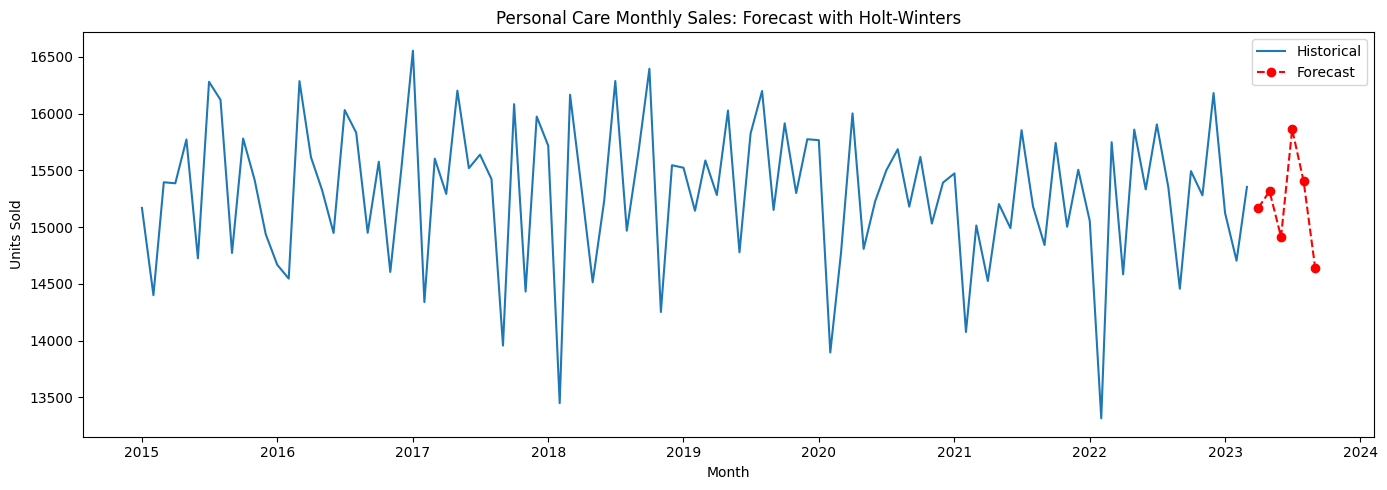

In [149]:
plt.figure(figsize=(14,5))
plt.plot(dept_monthly_clean.index, dept_monthly_clean.values, label='Historical')
plt.plot(forecast_index, forecast, 'r--o', label='Forecast')
plt.title("Personal Care Monthly Sales: Forecast with Holt-Winters")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.legend()
plt.tight_layout()
plt.show()


In [150]:
import numpy as np

# 1. Get forecast for the next month (first forecast value)
next_month_forecast = forecast[0]

# 2. Calculate annual demand
annual_demand = next_month_forecast * 12

# 3. Set example costs
ordering_cost = 100     # Cost to place one order ($)
holding_cost = 2        # Holding cost per unit per year ($)

# 4. Calculate EOQ
EOQ = np.sqrt((2 * annual_demand * ordering_cost) / holding_cost)

print(f"Next month's forecast: {int(next_month_forecast)} units")
print(f"Estimated annual demand: {int(annual_demand)} units")
print(f"EOQ (Economic Order Quantity): {int(EOQ)} units per order")


Next month's forecast: 15171 units
Estimated annual demand: 182062 units
EOQ (Economic Order Quantity): 4266 units per order


In [151]:
# Number of orders per year
orders_per_year = annual_demand / EOQ
print(f"Recommended number of orders per year: {orders_per_year:.2f}")

# Time between orders (in days, assuming 12 months per year, 30 days per month)
days_between_orders = 365 / orders_per_year
print(f"Time between orders: {days_between_orders:.1f} days")


Recommended number of orders per year: 42.67
Time between orders: 8.6 days


In [152]:
# Calculate standard deviation of historical monthly demand
demand_std = dept_monthly_clean.values.std()
print(f"Standard deviation of monthly demand: {int(demand_std)} units")


Standard deviation of monthly demand: 634 units


In [153]:
lead_time_days = 10
days_in_month = 30
lead_time_months = lead_time_days / days_in_month


In [154]:
Z = 1.65  # For 95% service level
safety_stock = Z * demand_std * np.sqrt(lead_time_months)
print(f"Recommended safety stock: {int(safety_stock)} units")


Recommended safety stock: 604 units


In [155]:
expected_demand_during_lead = next_month_forecast * lead_time_months
reorder_point = expected_demand_during_lead + safety_stock
print(f"Reorder Point: {int(reorder_point)} units")


Reorder Point: 5661 units


In [156]:
# Total units sold per product (across all time)
product_sales = (orders_products.groupby(['product_id', 'product_name'])['quantity']
                 .sum()
                 .reset_index())

# Sort by sales volume
product_sales_sorted = product_sales.sort_values('quantity', ascending=False)

# Top 10 fast movers
print("Top 10 Fast-Moving Products:")
print(product_sales_sorted.head(10))

# Bottom 10 slow movers (that have at least 1 sale)
print("\nTop 10 Slow-Moving Products (non-zero sales):")
print(product_sales_sorted[product_sales_sorted['quantity'] > 0].tail(10))


Top 10 Fast-Moving Products:
       product_id                                       product_name  quantity
21431       21432                            Colby Jack Cheese Block       479
27631       27632                             Ocean Breeze Body Wash       461
6454         6455                               Organic Magic Muesli       455
22612       22613                  Organic African Nectar Herbal Tea       444
30078       30079                Shea Butter & Vitamin E Body Lotion       443
26625       26626                          PLOCHMANS Squeeze Mustard       440
28184       28185          Vanilla, Tangerine & Shortbread Ice Cream       437
38188       38189  Clif Kid ZBar Organic Iced Lemon Cookie Energy...       435
31144       31145              Fine De Luxe Blended Canadian Whiskey       433
27731       27732            Healthy Skin & Hair Plus Nails Softgels       432

Top 10 Slow-Moving Products (non-zero sales):
       product_id                         product_name 

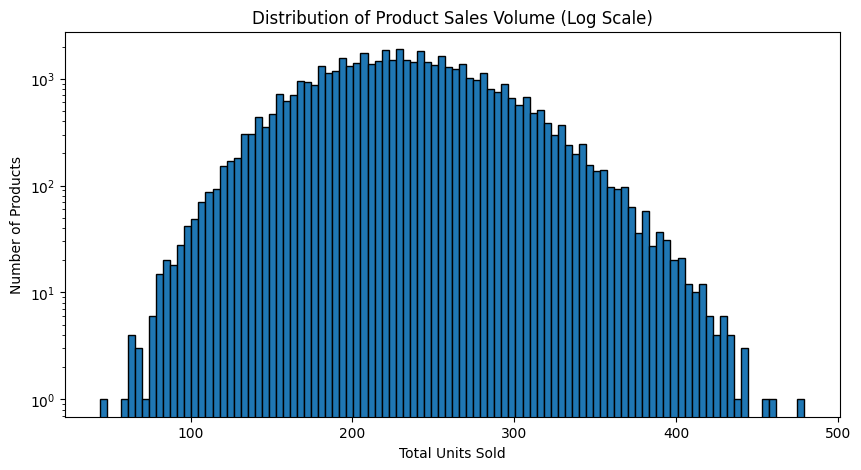

In [157]:
plt.figure(figsize=(10,5))
plt.hist(product_sales_sorted['quantity'], bins=100, edgecolor='k', log=True)
plt.title('Distribution of Product Sales Volume (Log Scale)')
plt.xlabel('Total Units Sold')
plt.ylabel('Number of Products')
plt.show()


In [158]:
# Total units sold per department
department_sales = (orders_products.groupby('department')['quantity']
                    .sum()
                    .sort_values(ascending=False)
                    .reset_index())

print("Departments ranked by total sales:\n", department_sales)


Departments ranked by total sales:
          department  quantity
0     personal care   1518767
1            snacks   1454220
2            pantry   1246148
3         beverages   1016127
4            frozen    930907
5        dairy eggs    796570
6         household    714169
7      canned goods    487942
8   dry goods pasta    429368
9           produce    392167
10           bakery    350005
11             deli    308194
12          missing    295721
13    international    263894
14        breakfast    258082
15           babies    252182
16          alcohol    247486
17             pets    226135
18     meat seafood    209355
19            other    127610
20             bulk      8957


In [159]:
# Example for top product
top_product = product_sales_sorted.iloc[0]
annual_sales_top = top_product['quantity'] / (dept_monthly_clean.index.year.nunique())
turnover_ratio = annual_sales_top / EOQ  # Using EOQ as proxy for average inventory

print(f"Annual sales for {top_product['product_name']}: {int(annual_sales_top)} units")
print(f"Estimated turnover ratio (using EOQ as avg inventory): {turnover_ratio:.2f}")


Annual sales for Colby Jack Cheese Block: 53 units
Estimated turnover ratio (using EOQ as avg inventory): 0.01


In [160]:
# Calculate "annual" sales for each product
product_sales['annual_sales'] = product_sales['quantity'] / dept_monthly_clean.index.year.nunique()

# Assume average inventory is EOQ for all products (for illustration)
product_sales['turnover_ratio'] = product_sales['annual_sales'] / EOQ

# See top and bottom turnover ratios
print(product_sales.sort_values('turnover_ratio', ascending=False).head(10))


       product_id                                       product_name  \
21431       21432                            Colby Jack Cheese Block   
27631       27632                             Ocean Breeze Body Wash   
6454         6455                               Organic Magic Muesli   
22612       22613                  Organic African Nectar Herbal Tea   
30078       30079                Shea Butter & Vitamin E Body Lotion   
26625       26626                          PLOCHMANS Squeeze Mustard   
28184       28185          Vanilla, Tangerine & Shortbread Ice Cream   
38188       38189  Clif Kid ZBar Organic Iced Lemon Cookie Energy...   
31144       31145              Fine De Luxe Blended Canadian Whiskey   
27731       27732            Healthy Skin & Hair Plus Nails Softgels   

       quantity  annual_sales  turnover_ratio  
21431       479     53.222222        0.012473  
27631       461     51.222222        0.012005  
6454        455     50.555556        0.011848  
22612       444

In [161]:
# Example: Sales per product for the last 12 months
last_year = orders_products[orders_products['order_date'] > (orders_products['order_date'].max() - pd.DateOffset(months=12))]
last_year_sales = (last_year.groupby(['product_id', 'product_name'])['quantity'].sum().reset_index())
print("Top sellers in the last 12 months:")
print(last_year_sales.sort_values('quantity', ascending=False).head(10))


Top sellers in the last 12 months:
       product_id                               product_name  quantity
5485         5941           G2 Low Calorie Fruit Punch Drink       130
19151       20786        Deli Style Parmesan Caesar Croutons       125
25620       27798         Sage & Aloe Throat Shield Lozenges       120
668           714    Breakfast Blend Light Roast K-Cup Packs       119
37613       40780                        Blemish Touch Stick       119
44972       48740  Men's Bearglove Anti-Perspirant/Deodorant       117
21392       23235  Eucalyptus Peppermint Scented Body Lotion       117
28726       31145      Fine De Luxe Blended Canadian Whiskey       115
45846       49688                     Fresh Foaming Cleanser       114
44717       48465                          Water New Zealand       114


In [162]:
product_sales_sorted['cumulative_perc'] = product_sales_sorted['quantity'].cumsum() / product_sales_sorted['quantity'].sum()
product_sales_sorted['ABC'] = pd.cut(
    product_sales_sorted['cumulative_perc'],
    bins=[0, 0.2, 0.5, 1.0],
    labels=['A', 'B', 'C']
)
print(product_sales_sorted.groupby('ABC')['quantity'].describe())


       count        mean        std    min    25%    50%    75%    max
ABC                                                                   
A     7254.0  317.989799  25.994726  288.0  298.0  311.0  331.0  479.0
B    13173.0  262.681090  12.931033  242.0  252.0  262.0  273.0  288.0
C    29261.0  197.088616  31.249390   44.0  177.0  202.0  222.0  242.0


/var/folders/0s/y1xyyt75329_kgbv_y81flg80000gn/T/ipykernel_38890/2984457543.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(product_sales_sorted.groupby('ABC')['quantity'].describe())


In [163]:
# Assume forecast_index (dates) and forecast (values) from your earlier model
import pandas as pd

forecast_df = pd.DataFrame({
    'Month': forecast_index.strftime('%Y-%m'),
    'Forecasted_Sales': forecast
})
forecast_df.to_csv('exports/forecast_personal_care.csv', index=False)


In [164]:
# If you have ABC analysis table
product_sales_sorted.to_csv('exports/turnover_by_product.csv', index=False)

department_sales.to_csv('exports/department_sales.csv', index=False)

# Example: Monthly sales for personal care
dept_monthly_clean.to_frame('Units_Sold').reset_index().to_csv('exports/monthly_sales_personal_care.csv', index=False)


In [165]:
import pandas as pd

# Load your data
df = pd.read_csv('exports/sales_actual_forecast_combined.csv')

# Process actuals
actual = df[df['Type'] == 'Actual'][['order_date', 'Units_Sold', 'Type']].rename(
    columns={'order_date': 'Date', 'Units_Sold': 'Sales'}
)
actual['Date'] = pd.to_datetime(actual['Date'])

# Process forecasts
forecast = df[df['Type'] == 'Forecast'][['Date', 'Sales', 'Type']]
# For forecast, force the date string to month start
forecast['Date'] = pd.to_datetime(forecast['Date'], format='%Y-%m')

# Combine and save
combined = pd.concat([actual, forecast], ignore_index=True)
combined['Date'] = pd.to_datetime(combined['Date'])
combined.to_csv('exports/sales_actual_forecast_combined_clean.csv', index=False)


In [167]:
import pandas as pd

# Change the file paths if needed!
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')

# Merge orders and products on product_id
merged = orders.merge(products, on='product_id')
# Merge with departments to get department names
merged = merged.merge(departments, on='department_id')

# Convert order_date to datetime, extract year-month
merged['order_date'] = pd.to_datetime(merged['order_date'])
merged['year_month'] = merged['order_date'].dt.to_period('M').astype(str)

# Group by department and month, summing quantity
dept_monthly = merged.groupby(['department', 'year_month'])['quantity'].sum().reset_index()

# Save as CSV (now in 'exports' folder)
dept_monthly.to_csv('exports/department_monthly_sales.csv', index=False)
